<div style="float:left">
            <h1 style="width:450px">CASA0007 Practical 4: Hypothesis Testing</h1>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

Welcome!

In this practical, we will apply the hypothesis testing techniques to the toddler dataset.

- Mean comparison test;
- KS distribution test;

In [1]:
# import relevant packages

import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Background

Local authority introduces scheme to address child malnutrition.

Data: weight (in kg) of four-year olds.

Sample 1: 100 pre-intervention

Sample 2: 100 post-intervention

(Note: The two samples are of different children)

In [2]:
# Get the data on the weights of 4-year-olds:
data = pd.read_csv('https://github.com/huanfachen/QM_2021/raw/main/data/toddler_data.csv')[['sample_1','sample_2']]

# Look at the first few rows:
data.head()

,sample_1,sample_2
0,13.4,14.2
1,13.9,13.1
2,13.9,15.3
3,14.7,13.6
4,14.8,14.4


In [3]:
# For convenience...

# Store each sample separately:
data1 = data['sample_1']
data2 = data['sample_2']

# Store some useful values

min1 = data1.min()
min2 = data2.min()

max1 = data1.max()
max2 = data2.max()

mean1 = data1.mean()
mean2 = data2.mean()

std1 = data1.std()
std2 = data2.std()

n1 = len(data1)
n2 = len(data2)

# And print some summary information:

data.describe()

,sample_1,sample_2
count,100.000000,100.000000
mean,13.952000,14.304000
std,1.214931,1.249882
min,11.300000,10.700000
25%,13.175000,13.550000
50%,14.000000,14.200000
75%,14.800000,15.000000
max,16.900000,18.000000


<Axes: >

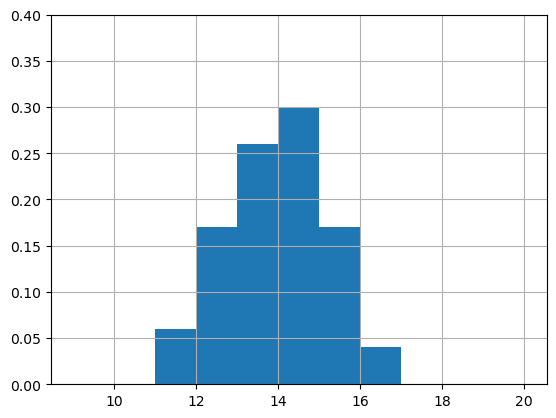

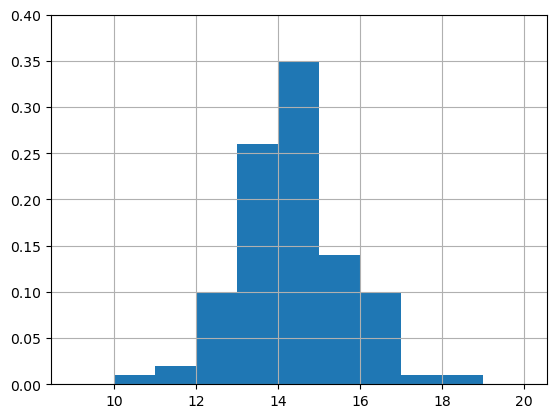

In [4]:
# Visualise the distribution of the data (as histograms)

# Set common x-limits for the histograms:
# (using int() is a trick to round to the integer below)
hist_min = int(min(min1,min2)) - 1
hist_max = int(max(max1,max2)) + 2
x_range = [hist_min, hist_max]

# Set common y-limits for the histograms:
y_range = [0.0,0.4]

# Choose an appropriate number of columns for the histogram:
# (This choice will give us columns of width 1)
n_cols = hist_max - hist_min

# Now create the plots:
# (The plt.figure(x) functions create new plots preventing...
# ... both histograms from being drawn on the same axes.)

plt.figure(1)
data['sample_1'].hist(range=x_range, bins=n_cols, density=True)
plt.ylim(y_range)

plt.figure(2)
plt.ylim(y_range)
data['sample_2'].hist(range=x_range, bins=n_cols, density=True)


In [5]:
# The distributions look roughly normal
# They do seem a little different, but could this be down to random chance?

### Test 1 - Mean Comparison Test

The two samples have different means, but let's test whether this could be down to random chance.

Could they be drawn from populations with the same mean?

(The sample sizes (100) are fairly large so the mean comparison test is valid.)

Step 1

In [6]:
# H0: Mean of population 1 =  Mean of population 1
# H1: Mean of population 1 <> Mean of population 1

Step 2

In [7]:
# Set significance level:

alpha = 0.05

Step 3-4

In [8]:
# There is a built-in scipy.stats function (ttest_ind) that does steps 3 and 4 for us.
# We just need to know whether we can assume that the samples are drawn...
# ... from populations with the same standard deviation or not.
# (Provided neither standard deviation is double the other, this should be ok)

std_ratio = std1/std2

print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

std_ratio = 0.9720359813764006
Can assume equal population standard deviations.


In [9]:
# Calculate the test statistic and the p-value:
# There are two outputs from the function of sps.ttest_ind: the **test statistic** and the **p value**

test_stat, p_value = sps.ttest_ind(data1, data2, equal_var = equal_stds)
print("p-value =", p_value)

p-value = 0.04479005662769824


Step 5

In [10]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different means.


### Test 2 - KS Distribution Test

What about the shape of the distributions?

Could the visible difference in the distributions (see the histograms) be down to random chance?

(The data is continuous, so the KS test is valid.)

Step 1

In [11]:
# H0: Sample 1 and Sample 2 are drawn from identical distributions.
# H1: Sample 1 and Sample 2 are not drawn from identical distributions.

Step 2

In [12]:
# Set significance level:

alpha = 0.05

Step 3-4

In [13]:
# There is a built-in scipy.stats function (ks_2samp) that does steps 3 and 4 for us:

KS_stat, p_value = sps.ks_2samp(data1,data2)

# Compare with the KS stat we calculated earlier:

print("KS stat =", KS_stat)
print("p-value =", p_value)

KS stat = 0.13
p-value = 0.36818778606286096


Step 5

In [14]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different distributions.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same distribution.")

p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same distribution.


## Conclusions

We have applied the mean comparison test and KS test to the toddler data. 

Now, can you try these techniques to other datasets and describe your findings in the language of hypothesis testing?

## Credits
### Contributors:
The following individuals have contributed to these teaching materials: Thomas Evans, Hannah Fry, [Huanfa Chen](huanfa.chen@ucl.ac.uk)

### License
These teaching materials are licensed under a mix of The MIT License and the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license.

### Acknowledgements
NA

### Dependencies
This notebook depends on the following libraries: pandas, matplotlib, numpy, scipy